In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import io
from PIL import Image
from collections import OrderedDict
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [2]:
df = pd.read_csv('abusive.csv', encoding='latin1')
alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin1')

df.head()
# alay_dict.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


Tweet            HS  \
count                                               13169  13169.000000   
unique                                              13023           NaN   
top     USER USER USER USER USER USER USER USER USER U...           NaN   
freq                                                    9           NaN   
mean                                                  NaN      0.422280   
std                                                   NaN      0.493941   
min                                                   NaN      0.000000   
25%                                                   NaN      0.000000   
50%                                                   NaN      0.000000   
75%                                                   NaN      1.000000   
max                                                   NaN      1.000000   

             Abusive  HS_Individual      HS_Group   HS_Religion       HS_Race  \
count   13169.000000   13169.000000  13169.000000  13169.000000  13169.000000   
unique           NaN            NaN           NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN           NaN   
mean        0.382945       0.271471      0.150809      0.060217      0.042980   
std         0.486123       0.444735      0.357876      0.237898      0.202819   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      0.000000   
75%         1.000000       1.000000      0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

         HS_Physical     HS_Gender      HS_Other       HS_Weak   HS_Moderate  \
count   13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.024527      0.023236      0.284000      0.256891      0.129471   
std         0.154685      0.150659      0.450954      0.436935      0.335733   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      1.000000      1.000000      0.000000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

           HS_Strong  
count   13169.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.035918  
std         0.186092  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [4]:
# Menghitung jumlah tweet yang digolongkan sebagai HS dan Abusive
hs_count = df['HS'].sum()
abusive_count = df['Abusive'].sum()

print(f'Total Hate Speech: {hs_count}')
print(f'Total Abusive: {abusive_count}')

Total Hate Speech: 5561
Total Abusive: 5043


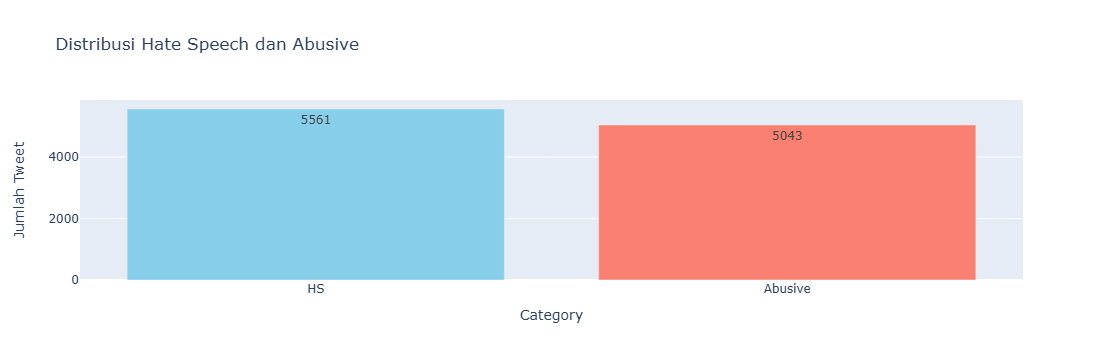

In [5]:
count_plot_data = df[['HS', 'Abusive']].sum().reset_index()
count_plot_data.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=count_plot_data['Category'], 
        y=count_plot_data['Count'], 
        text=count_plot_data['Count'], 
        textposition='inside', 
        marker_color=['skyblue', 'salmon']
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Hate Speech dan Abusive',
    xaxis_title='Category',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=0,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_hs_abusive_chart.html')

# Menampilkan grafik
fig.show()

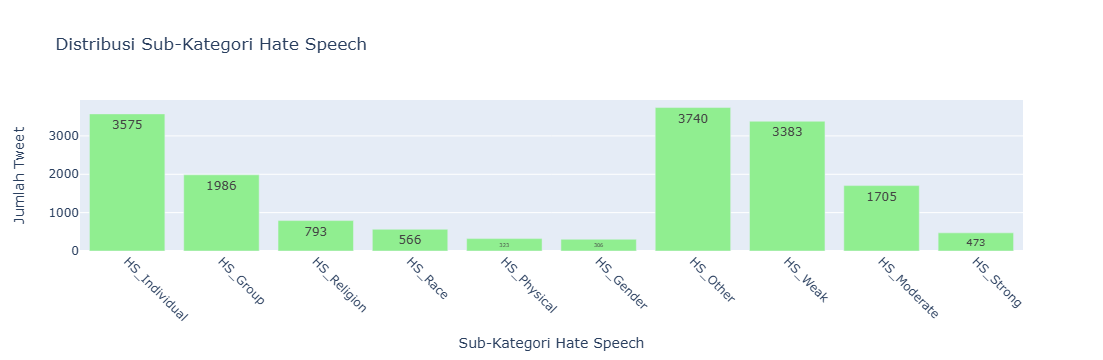

In [6]:
# Memfilter kolom yang diawali dengan 'HS_'
hs_subcategories = df.filter(like='HS_').sum().reset_index()
hs_subcategories.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=hs_subcategories['Category'], 
        y=hs_subcategories['Count'], 
        text=hs_subcategories['Count'], 
        textposition='inside', 
        marker_color='lightgreen'
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Sub-Kategori Hate Speech',
    xaxis_title='Sub-Kategori Hate Speech',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=45,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_subkategori_hs_chart.html')

# Menampilkan grafik
fig.show()

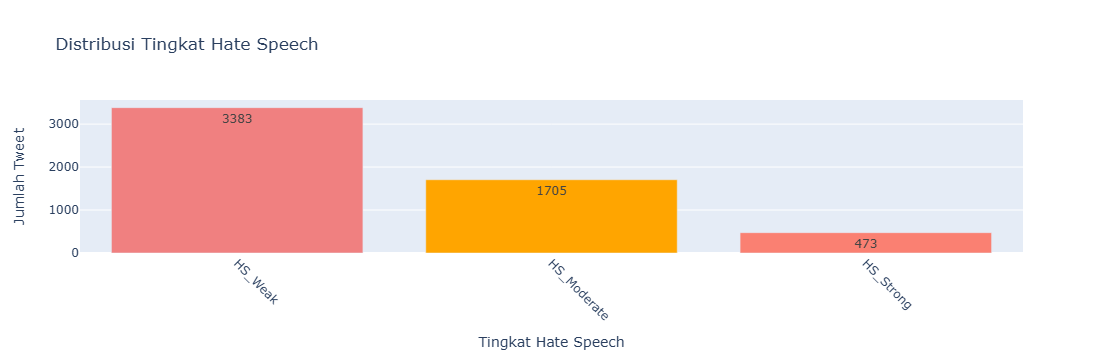

In [6]:
# Mengambil data untuk tingkat keparahan hate speech
severity_levels = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']].sum().reset_index()
severity_levels.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=severity_levels['Category'], 
        y=severity_levels['Count'], 
        text=severity_levels['Count'], 
        textposition='inside', 
        marker_color=['lightcoral', 'orange', 'salmon']
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Tingkat Hate Speech',
    xaxis_title='Tingkat Hate Speech',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=45,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_tingkat_hs_chart.html')

# Menampilkan grafik
fig.show()

In [7]:
alay_dict.columns = ['original', 'slang']
alay_dict.head()

original                     slang
0  anakjakartaasikasik  anak jakarta asyik asyik
1         pakcikdahtua         pak cik sudah tua
2       pakcikmudalagi         pak cik muda lagi
3          t3tapjokowi              tetap jokowi
4                   3x                 tiga kali

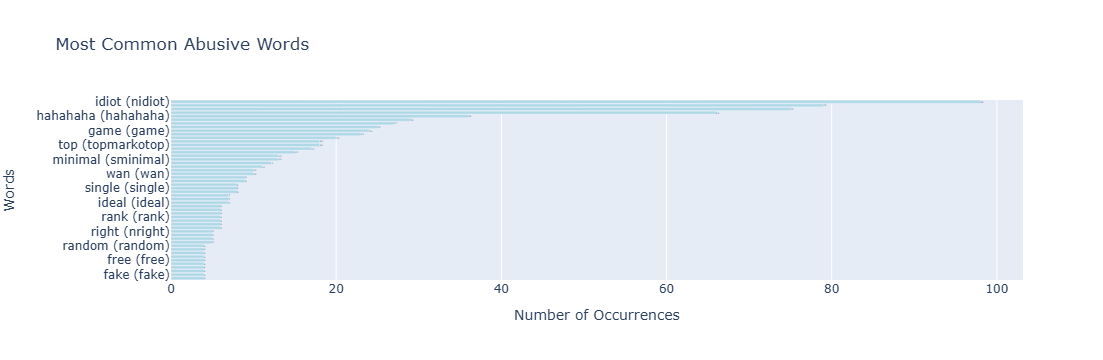

In [8]:
# Initialize stopwords and custom blacklist
stop_words = set(stopwords.words('english'))
custom_blacklist = set([
    'user', 'juga', 'tidak', 'nah', 'saya', 'kamu', 'dia', 'kami', 'mereka', 'nya',
    'itu', 'ini', 'nya', 'apa', 'saja', 'dns', 'atas', 'dengan', 'bila', 'karena'
    # and other custom words as needed
])
all_blacklist = stop_words.union(custom_blacklist)

# Lemmatizer for word root extraction
lemmatizer = WordNetLemmatizer()

# Define a function to clean and filter words
def clean_text(text):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = token.lower()
        if token in all_blacklist or not token.isalpha():
            continue
        lemmatized_token = lemmatizer.lemmatize(token)
        blob = TextBlob(lemmatized_token)
        if blob.sentiment.polarity != 0:  # Filter by sentimen
            cleaned_tokens.append(lemmatized_token)
    return cleaned_tokens

# Sample data for testing
# df = pd.DataFrame({'Tweet': ['Some tweet text here', 'Another tweet text here']})  # Replace with actual data loading

# Combine all tweets into one text and clean it
all_text = ' '.join(df['Tweet'].astype(str))
cleaned_all_text = clean_text(all_text)

# Calculate word frequency
counter_tweets = Counter(cleaned_all_text)

# Calculate word frequency in individual tweets
tweets = df.iloc[:, 0].tolist()
word_list = [word for tweet in tweets for word in clean_text(tweet)]
counter_tweets = Counter(word_list)

# Get the top 50 words
top_tweets = OrderedDict(counter_tweets.most_common(50))

keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

# Ensure alay_dict is defined somewhere in the code
# Example: alay_dict = pd.DataFrame({'slang': ['slang_word'], 'original': ['original_word']})
original_slang = []
for word in keys:
    if word in alay_dict['slang'].values:
        original_word = alay_dict.loc[alay_dict['slang'] == word, 'original'].values
        if original_word.size > 0:
            original_slang.append(original_word[0])
        else:
            original_slang.append(word)
    else:
        original_slang.append(word)

combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

# Create DataFrame for Plotly
plot_df = pd.DataFrame({
    'Words': combined_words,
    'Counts': vals
})

# Create bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=plot_df['Counts'],
        y=plot_df['Words'],
        text=plot_df['Counts'],
        textposition='auto',
        orientation='h',
        marker_color='lightblue'
    )
])

# Update layout
fig.update_layout(
    title='Most Common Abusive Words',
    xaxis=dict(title='Number of Occurrences'),
    yaxis=dict(title='Words', autorange='reversed'),  # Reversed to match Seaborn's behavior of sorting by value
    showlegend=False,
    margin=dict(l=150)  # Adjust for long word labels
)

# Save plot as HTML
fig.write_html('static/most_common_abusive_words.html')

# Show plot
fig.show()

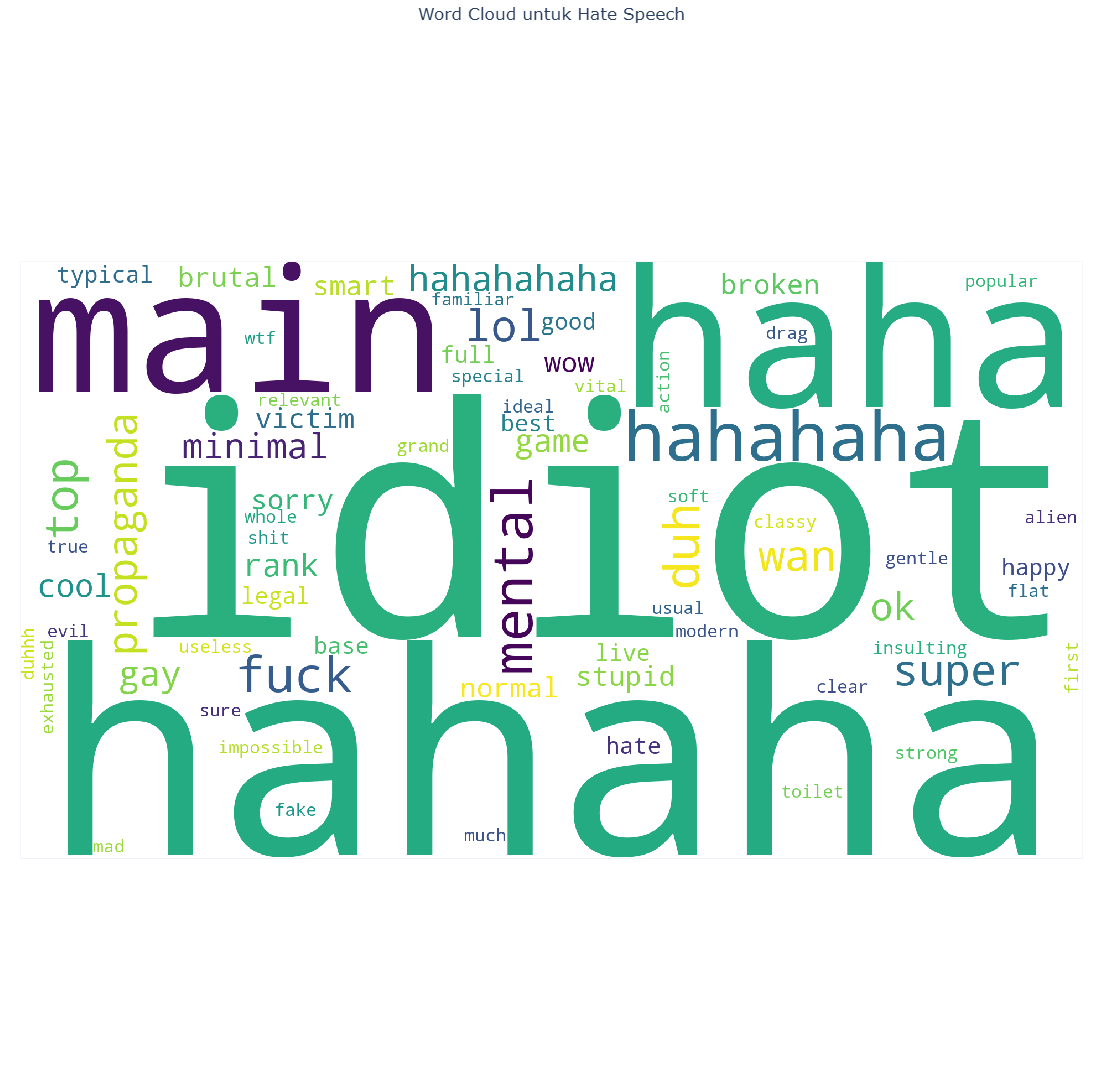

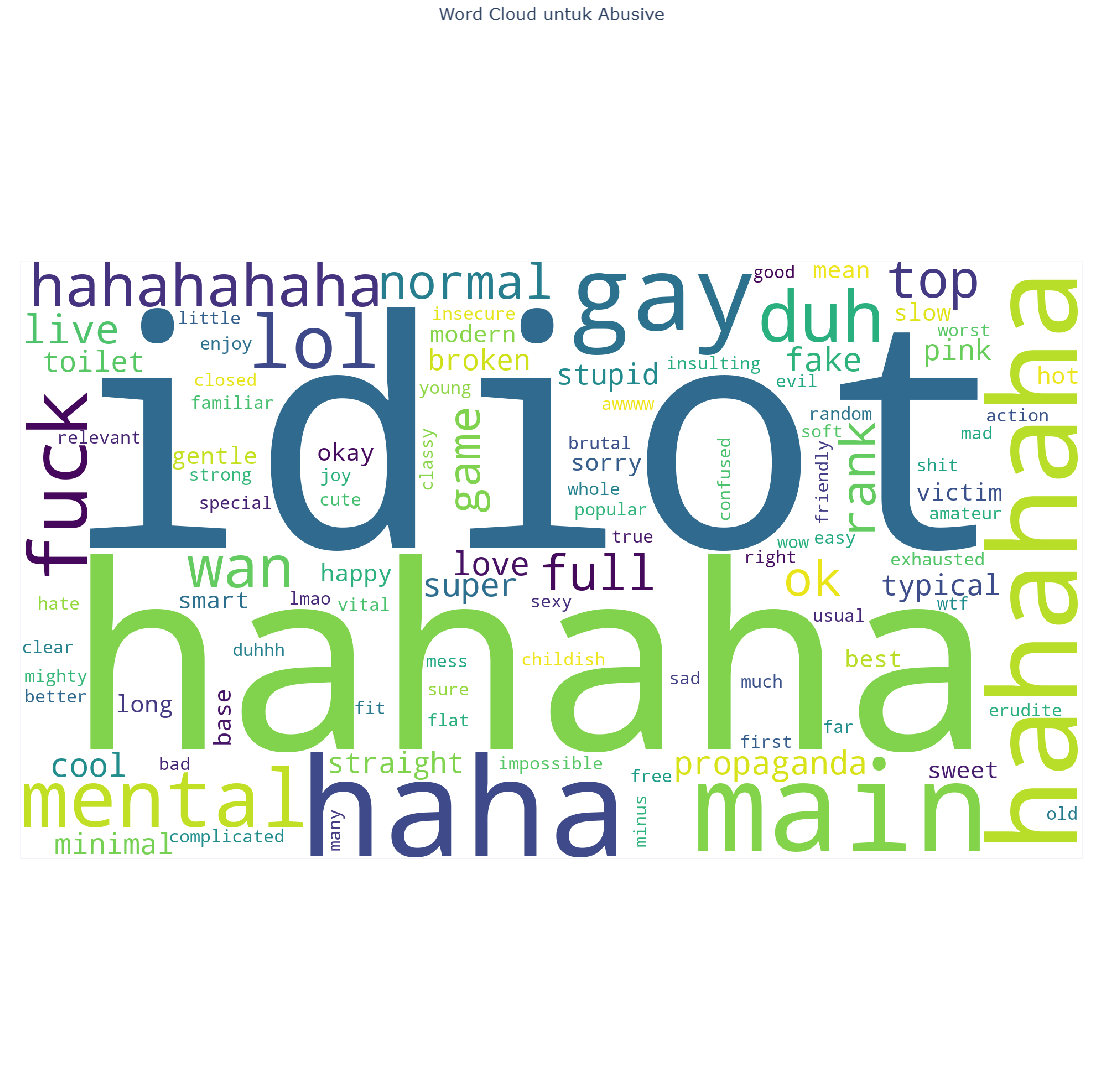

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = token.lower()
        if token in stop_words or not token.isalpha():
            continue
        lemmatized_token = lemmatizer.lemmatize(token)
        blob = TextBlob(lemmatized_token)
        if blob.sentiment.polarity != 0:
            cleaned_tokens.append(lemmatized_token)
    return " ".join(cleaned_tokens)

def generate_wordcloud(data, width=1920, height=1080):
    cleaned_data = [clean_text(text) for text in data]
    wordcloud = WordCloud(width=width, height=height, background_color='white').generate(' '.join(cleaned_data))
    return wordcloud

def plot_wordcloud(data, title, filename, width=1920, height=1080):
    wc = generate_wordcloud(data, width, height)
    
    # Convert WordCloud to image
    img_buf = io.BytesIO()
    wc.to_image().save(img_buf, format='PNG')
    img_buf.seek(0)
    img = Image.open(img_buf)

    fig = px.imshow(img)
    fig.update_layout(
        title=title,
        margin=dict(l=0, r=0, t=40, b=0),
        title_x=0.5,
        width=width,
        height=height
    )
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)

    # Save plot as HTML
    fig.write_html(filename)
    fig.show()


# Membuat dan menyimpan word cloud sebagai HTML
plot_wordcloud(df[df['HS'] == 1]['Tweet'], 'Word Cloud untuk Hate Speech', 'static/wordcloud_hs1.html', width=1920, height=1080)
plot_wordcloud(df[df['Abusive'] == 1]['Tweet'], 'Word Cloud untuk Abusive', 'static/wordcloud_abusive1.html', width=1920, height=1080)